## Plot data from `abide_motion_wrapper.py`

In [9]:
library(dplyr)
library(ggplot2)
library(knitr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
data<-read.csv("../RESULTS_bin/SummaryRsqs.csv",header = TRUE, sep = ",")
head(data)
attach(data)

,motion_thresh,med_rsq,CI_95,med_icc,CI_95_icc,n,age_l,age_u
1,50.00000000,0.86749487,0.15140379,0.93437604,0.07460912,20.00000000,6.00000000,18.00000000
2,65.00000000,0.90981842,0.14721701,0.95548640,0.06453941,30.00000000,6.00000000,18.00000000
3,60.00000000,0.97270180,0.03760561,0.98622421,0.01718400,100.00000000,6.00000000,18.00000000
4,35.00000000,0.96734236,0.05291633,0.98365908,0.02506813,80.00000000,6.00000000,18.00000000
5,60.00000000,0.95366882,0.07605641,0.97697349,0.03599832,60.00000000,6.00000000,18.00000000
6,70.00000000,0.93266660,0.07137071,0.96621653,0.03895027,40.00000000,6.00000000,18.00000000


### Check that motion threshold and sample sizes and permutation numbers look right

In [4]:
table(data$motion_thresh) 


 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 

In [5]:
table(data$n) 


 10  20  30  40  50  60  70  80  90 100 
 16  16  16  16  16  16  16  16  16  16 

## Plotting! 

First look at median R sqr by motion threshold and sample size

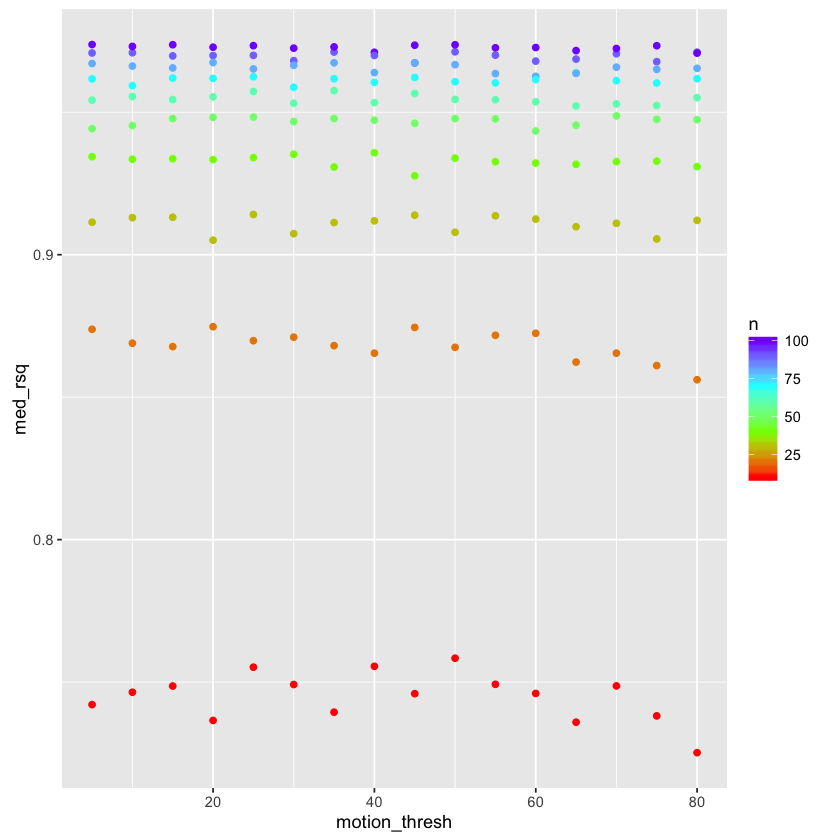

In [10]:
ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n))+geom_point() +scale_colour_gradientn(colours=rainbow(4))

### Add in 95% CI

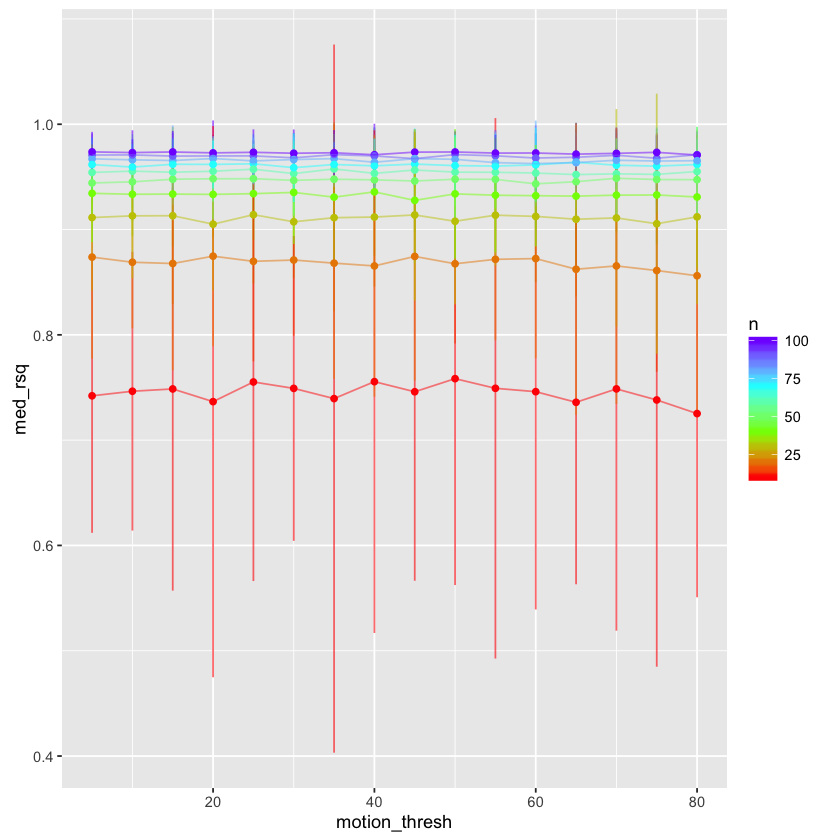

In [11]:
aplot <-ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n)) +scale_colour_gradientn(colours=rainbow(4))+
geom_errorbar(aes(ymin=med_rsq-CI_95/2, 
			  ymax=med_rsq+CI_95/2), 
		      width=0, alpha=.6)+geom_point()+
		geom_line(alpha=.5)


print(aplot)
#ggsave(aplot, filename='/Users/Jlnrd/Desktop/mean_by_perc_fd.jpg',  width=6, height=6)#, units='in', dpi=150) 
